# More Work on SOM


In the last project implemented in som.ipynb, we have identified the frauds by training a SOM, based on the customers' dataset of the credit card applications from a bank.

Let's have more work here. The idea is to make an advanced model, where we can predict the probability that each
customer cheated.

To achieve this we need to go from unsupervised to supervised learning,  making a Hybrid Deep Learning Model.

So, the work consists of two parts:

1). Simply to obtain the results from the previous SOM training for identifying potential cheaters.

2). Based on the list of customers, who are potential cheaters, we add a supervised model, an ANN, to predict the probability of each customer cheated.




# Step 1

In [2]:

# Simply copy som.py or som.ipynb, to identify the frauds with the Self-Organizing Map, until ... show()

Now, we execute this part of code to get the self organizing map, that will contain
the outline neurons.

In [3]:
# Mega Case Study - Make a Hybrid Deep Learning Model

# Part 1 - Identify the Frauds with the Self-Organizing Map


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

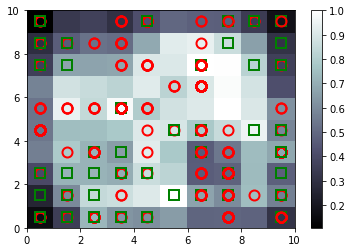

In [5]:

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


Here it is.

Recall that we can get this outline neuron, which is characterized by a large "MIT the mean into neuron distance",
introduced in the last preject.

In addition, it contains both category of customers that got their application "approved" and "not approved".



In [9]:
# Each time when you execute the codes above, the "white area" coordinates will be different randomly on the map

In [10]:
# In my experience

# First run, I found the two whitest nueros with coordinates (5,3) and (8,3) in the map
# Second run, (5,3) and (8,3)
# Third run, (3,5) and (7,8)
# ...

# this is because that the initialization of the neuros are random for training. So, it leads to different maps.
# However, it does not change the pattern of input data as well as the topology (or correlations) of output neuros.
 
# So, it does not effect the result of our analysis.





As a result, when you run the code, you will have different maps.

You need to identfy two "whitest" neuros in the map for each time and take their coordinates, that will be used in the following code.

In [11]:

# Finding the frauds
mappings = som.win_map(X)
# frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0) # coordinates for two neurons in his codes
frauds = np.concatenate((mappings[(3,5)], mappings[(7,8)]), axis = 0) # coordinates for two nueros in my map as above
frauds = sc.inverse_transform(frauds)



In [12]:

# Finding the frauds
mappings = som.win_map(X)
#frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0) # coordinates for two neurons
frauds = sc.inverse_transform(frauds)



In [13]:
frauds
# how to interpret the data below?# after inverse scaling
# the final result, the first colum - customer ID, potentially frauds
# 

array([[3.92737019e+12, 1.00000000e+00, 1.17218000e+03, 1.82000000e+02,
        5.00000000e+00, 4.00000000e+01, 3.30000000e+01, 3.56250000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 1.20000000e+05, 1.01000010e+07],
       [3.91886492e+12, 1.00000000e+00, 3.21107000e+03, 1.69120000e+02,
        5.00000000e+00, 5.30000000e+01, 3.30000000e+01, 1.14000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 0.00000000e+00, 2.69100001e+08],
       [3.91939485e+12, 1.00000000e+00, 2.75155500e+03, 3.73800000e+01,
        5.00000000e+00, 2.70000000e+01, 3.30000000e+01, 4.70250000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 3.36000000e+05, 1.00001000e+05],
       [3.89723415e+12, 1.00000000e+00, 1.31050000e+03, 2.68380000e+02,
        5.00000000e+00, 7.90000000e+01, 3.30000000e+01, 2.25150000e+01,
        0.00000000e+00, 0.00000000e+0


All right,  we have identified 37 frauds here.

Now we're going to use the results to go from unsupervised to supervised deep learning. 

# Step 2

Here, we only need a matrix of features that can potentially help predict the probability of a fraud.

Since all the "customer I.D." will definitely not help us to predict the probability of fraud, We remove it. Then, we can include all the columns or features, except the first one.


In [ ]:
# Exercises:

# Check the dataset and see if there is any other feature not useful for predction.

In [15]:
# Part 2 - Going from Unsupervised to Supervised Deep Learning

# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# original dataset, shown at begining in code and the dataset as below is
# X = dataset.iloc[:, :-1].values

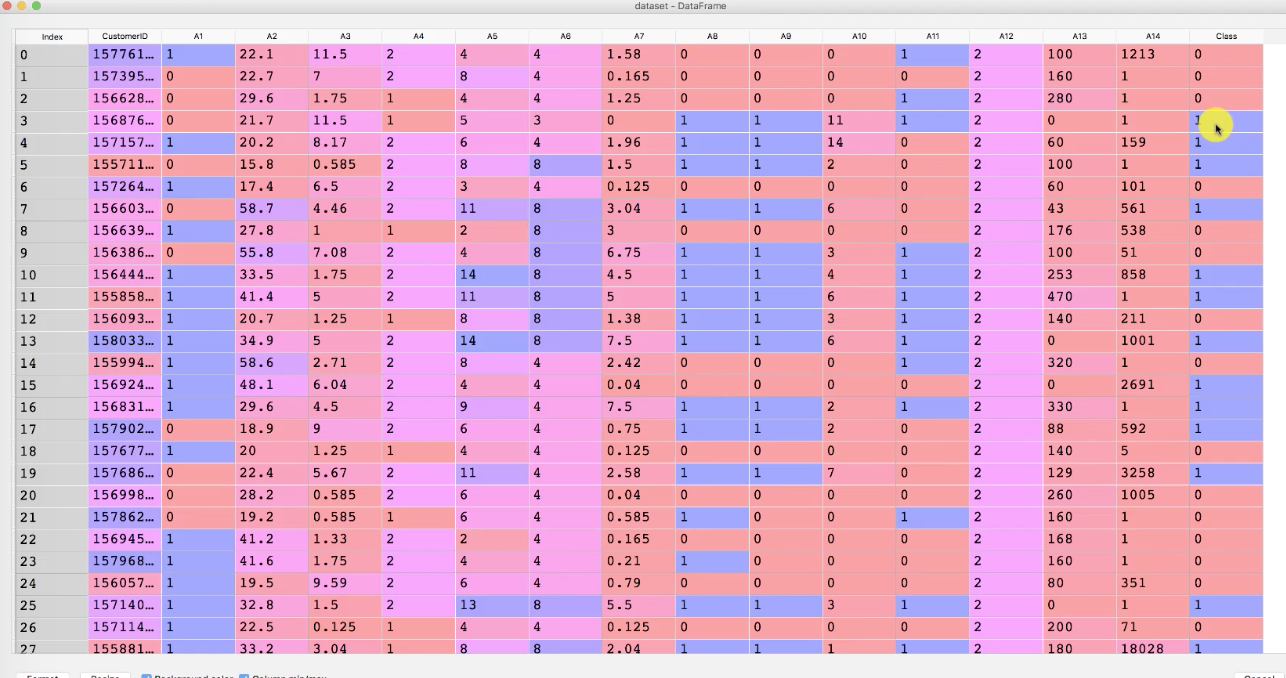

In [16]:

# Creating the dependent variable

is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1


In [17]:
# how to create dependent variable, the codes as above and the expalaination as below


Why is a dependent variable needed?

We will use it as the outcomes of supervised learning to indicate whether there was fraud or not.

It's a variable with binary data. If there is fraud, it's "1", otherwise "0".

Thanks to the SOM generated by unsupervised learning previously, based on which we can get a list of customers who are potential cheaters.

So, we can extract the customer IDs of this list of frauds from the original dataset. Then, we will use this to create our dependent variable.


The basic idea is that we're going to initialize a vector of zeros a vector of six hundred and nine to zeroes. It's like we're pretending that at the beginning all the customers didn't cheat.

Then, we will extract these customer IDs corresponding to potential frauds and put  "1s" (ones) in the vector of zeroes. It is noted that the index of the dataset corresponds to these customer IDs.

So, we can see 37 "1s" in the vector, since we have 37 customers in the list of fraudsand from previous SOM's result.


# Step 3

In [18]:
# next, we train an ANN, 

# idea is to copy the template of ann.py and make some change.

# look at the codes below at first, I will give comments after.


We don't need to take the data processing phase, given in ann.py.  But, we still need the feature scaling part, as it's required to train an artificial neural network.

We keep similar architecture of the ANN, presnted in ann.py, plus the training here with the fit method.

Make sure of your understanding the codes.




In [19]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)



/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.4199 - acc: 0.9986
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.0739 - acc: 1.0000


# Step 4

In [22]:
# Predicting the probabilities of frauds

y_pred = classifier.predict(customers)


In [23]:
y_pred

array([[0.02850642],
       [0.02650015],
       [0.01369172],
       [0.03788744],
       [0.03646965],
       [0.04134966],
       [0.01428457],
       [0.01317213],
       [0.01928652],
       [0.03772449],
       [0.01553207],
       [0.0152401 ],
       [0.03887909],
       [0.00980965],
       [0.04475037],
       [0.09703404],
       [0.0284821 ],
       [0.05119276],
       [0.00883819],
       [0.0270174 ],
       [0.01904676],
       [0.02327275],
       [0.01583626],
       [0.04131   ],
       [0.02415581],
       [0.01580647],
       [0.00855317],
       [0.03263287],
       [0.03493682],
       [0.03338068],
       [0.02977874],
       [0.03749207],
       [0.05516843],
       [0.01661183],
       [0.0777429 ],
       [0.1208863 ],
       [0.05555486],
       [0.0137671 ],
       [0.01352811],
       [0.00926109],
       [0.04020571],
       [0.01156576],
       [0.05904774],
       [0.05293951],
       [0.03460211],
       [0.02585988],
       [0.01617577],
       [0.041

In [24]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1) 

# concatenate custom ID column and the last prediction column in horizontal way: axis = 1

y_pred

array([[1.57761560e+07, 2.85064243e-02],
       [1.57395480e+07, 2.65001487e-02],
       [1.56628540e+07, 1.36917243e-02],
       ...,
       [1.56754500e+07, 4.47648019e-02],
       [1.57764940e+07, 1.36917057e-02],
       [1.55924120e+07, 6.40294179e-02]])

In [25]:
y_pred = y_pred[y_pred[:, 1].argsort()] # all the probilities are sorted

In [26]:
y_pred

array([[1.57997850e+07, 8.43245944e-04],
       [1.56214230e+07, 1.61446410e-03],
       [1.56548590e+07, 1.96996145e-03],
       ...,
       [1.57672640e+07, 1.20886303e-01],
       [1.57257760e+07, 1.22478664e-01],
       [1.56647930e+07, 1.22900948e-01]])

In [27]:
y_pred[:, 1]

array([0.00084325, 0.00161446, 0.00196996, 0.00310061, 0.00316517,
       0.00372355, 0.00528202, 0.00541193, 0.00589193, 0.00601463,
       0.0063986 , 0.0064721 , 0.00654713, 0.00671558, 0.00683355,
       0.00687525, 0.00693543, 0.00716014, 0.00727756, 0.00746999,
       0.00799855, 0.00825051, 0.00835719, 0.00842496, 0.00851059,
       0.00855317, 0.00883819, 0.00887945, 0.00896866, 0.00914425,
       0.00926109, 0.00936055, 0.00953262, 0.00957383, 0.00959733,
       0.00967592, 0.00980965, 0.01000348, 0.01007   , 0.01017145,
       0.01017929, 0.01020227, 0.01029854, 0.01032612, 0.01054615,
       0.01058314, 0.01060599, 0.01060833, 0.01062643, 0.01063007,
       0.01063532, 0.01067217, 0.01076429, 0.01085973, 0.01092617,
       0.01126822, 0.0112808 , 0.01131865, 0.01140198, 0.01146232,
       0.01150408, 0.011565  , 0.01156576, 0.01157976, 0.01172127,
       0.01177317, 0.01179063, 0.01191465, 0.01200376, 0.01203841,
       0.01205502, 0.01206054, 0.01225316, 0.01226115, 0.01227